## 1-Libraries

In [61]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

In [2]:
df = pd.read_csv('Medical_insurance.csv')

## 2-data cleaning 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data = df 

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
data['sex'].replace(["female","male"],[1,2],inplace=True)
data['smoker'].replace(["yes","no"],[1,2],inplace=True)
data['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'],[1,2,3,4],inplace=True)

In [9]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


## 3-correlation and visualisation of categorical features 

In [10]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,0.023286,-0.000932,0.298624
sex,-0.026046,1.000000,0.042924,0.016020,-0.082326,-0.004808,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,-0.011489,-0.159178,0.199846
children,0.037574,0.016020,-0.001492,1.000000,-0.006362,-0.016111,0.066442
smoker,0.023286,-0.082326,-0.011489,-0.006362,1.000000,-0.006751,-0.788783
region,-0.000932,-0.004808,-0.159178,-0.016111,-0.006751,1.000000,0.013530
charges,0.298624,0.062837,0.199846,0.066442,-0.788783,0.013530,1.000000


In [11]:

for param in ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']:
    personr,p_value = stats.pearsonr(data[param],data['charges'])
    print ("the pearson coeficient of",param,": ",personr,"and the p value is ",p_value)


the pearson coeficient of age :  0.29862366562936277 and the p value is  3.316072999822761e-58
the pearson coeficient of sex :  0.06283682831973221 and the p value is  0.000932543938826889
the pearson coeficient of bmi :  0.1998460487397887 and the p value is  2.29352309185659e-26
the pearson coeficient of children :  0.06644231780125451 and the p value is  0.0004644482298017566
the pearson coeficient of smoker :  -0.7887833491419151 and the p value is  0.0
the pearson coeficient of region :  0.01352986926493516 and the p value is  0.47643008360049793
the pearson coeficient of charges :  0.9999999999999998 and the p value is  0.0


In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

/tmp/ipykernel_144/3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

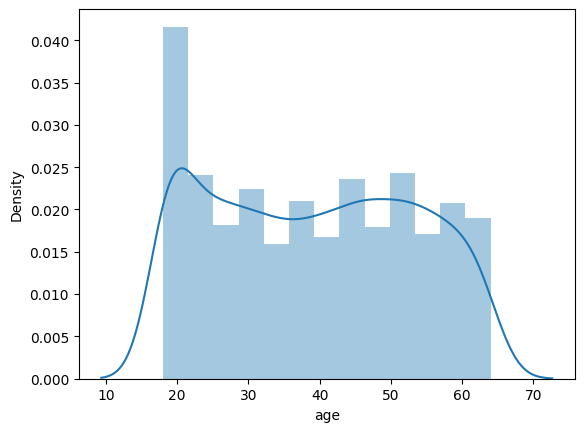

In [13]:
sns.distplot(df['age'])

Text(0.5, 1.0, 'sex/charges')

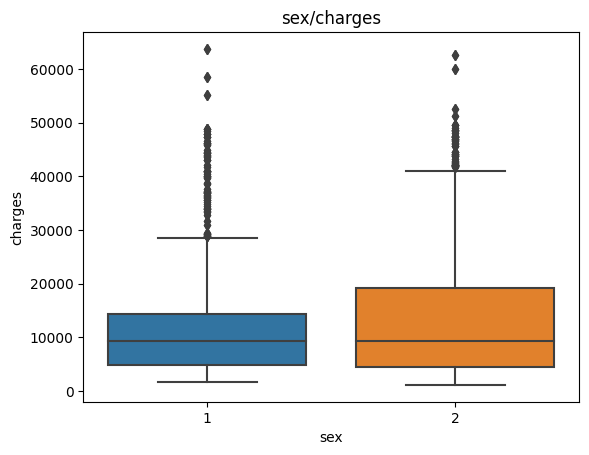

In [14]:
sns.boxplot(x= 'sex' ,y="charges" , data = df)
plt.title("sex/charges")
 

Text(0.5, 1.0, 'region/charges')

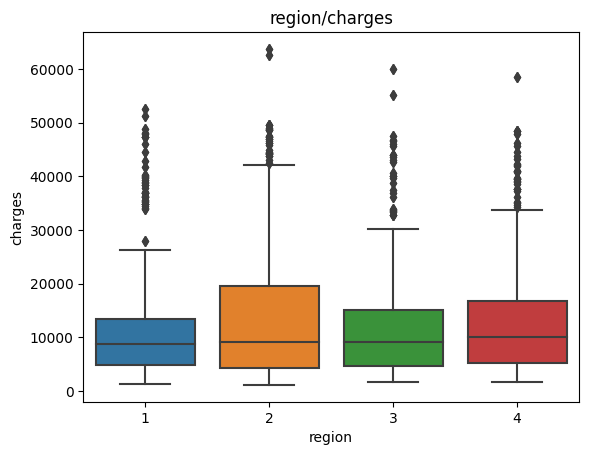

In [15]:
sns.boxplot(x= 'region' ,y="charges" , data = df)
plt.title("region/charges")


Text(0.5, 1.0, 'smoker/charges')

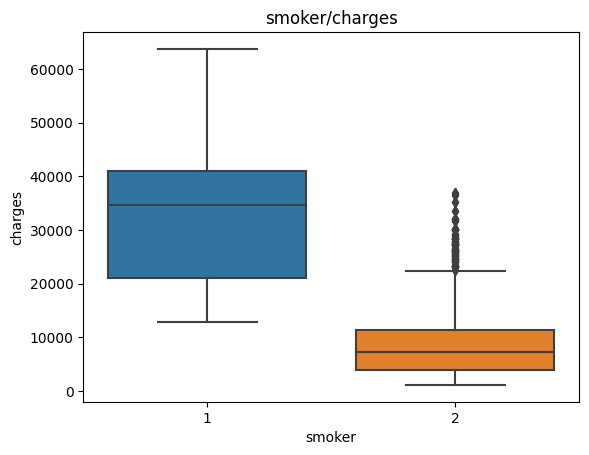

In [16]:
sns.boxplot(x= 'smoker' ,y="charges" , data = df)
plt.title("smoker/charges")

In [17]:
sns.boxplot(x="smoker",y="age",data = df )

<AxesSubplot: xlabel='smoker', ylabel='age'>

## 4-visualisation of contunious features 

<AxesSubplot: xlabel='age', ylabel='charges'>

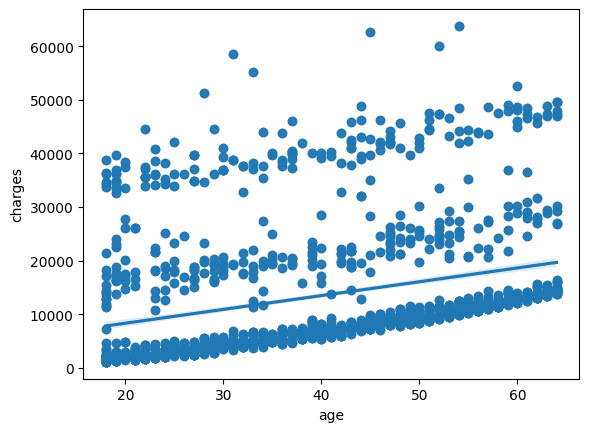

In [18]:
sns.regplot(x="age" , y="charges", data = df )

<AxesSubplot: xlabel='bmi', ylabel='charges'>

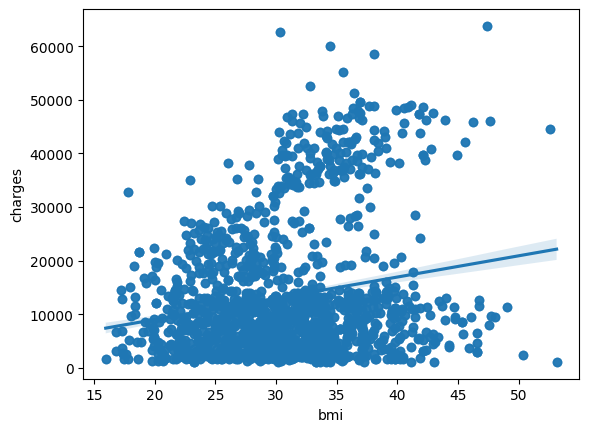

In [19]:
sns.regplot(x="bmi" , y="charges", data = df )

<AxesSubplot: xlabel='children', ylabel='charges'>

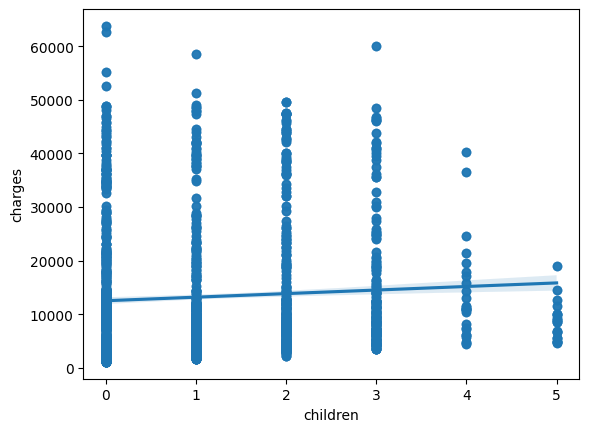

In [20]:
sns.regplot(x="children" , y="charges", data = df )

## 4-building models 

### 1-Multiple Linear Regression 

In [21]:
x_data = data.drop(["charges"],axis=1)
y_data = data['charges']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state = 1)

In [23]:
lr = LinearRegression()
lr

LinearRegression()

In [24]:
lr.fit(x_train,y_train)
Ytest = lr.predict(x_test)
Ytrain = lr.predict(x_train)
print("the test data score is :",lr.score(x_test,y_test))
print("the train data score :" , lr.score(x_train,y_train))

## Cross-validation 

In [25]:
cross_val = cross_val_score(lr,x_data,y_data,cv=4)
print("the mean score of the folds is ",cross_val.mean(),"the std is ",cross_val.std())

the mean score of the folds is  0.7501059787206282 the std is  0.001998971569357161


In [26]:
plt.figure(figsize=(12,8))
ax1=sns.distplot(Ytest , hist=False , label="test data prediction")
ax=sns.distplot(Ytrain , hist=False , label="train data prediction",ax=ax1)
ax=sns.distplot(y_test,hist=False,color="r",label="actual data", ax=ax1)
plt.legend()


/tmp/ipykernel_144/4149410001.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(Ytest , hist=False , label="test data prediction")
/tmp/ipykernel_144/4149410001.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Ytrain , hist=False , label="train data prediction",ax=a

### 2-Polynomial Regression 
let s search for the best degree that optimises the  predictions 

In [27]:
resultat = []
degree = [1,2,3,4,5]

for n in degree :
    poly = LinearRegression()
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr  = pr.fit_transform(x_test)
    poly.fit(x_train_pr,y_train)
    Y_pr=poly.predict(x_test_pr)
    resultat.append(poly.score(x_test_pr,y_test))

The purpose of this particular function is to establish the optimal degree of polynomial that is most conducive to achieving the highest possible R^2 score during the training phase of the Polynomial Model.

## cross val 

In [28]:
x_train_data = pr.fit(x_data)

In [29]:
cross_val2 = cross_val_score(poly,x_data,y_data,cv=4)
print("the mean score of the folds is ",cross_val.mean(),"the std is ",cross_val.std())

the mean score of the folds is  0.7501059787206282 the std is  0.001998971569357161


/tmp/ipykernel_144/3876456893.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(Ytest , hist=False ,color="y", label="test data prediction")
/tmp/ipykernel_144/3876456893.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_pr , hist=False , label="train data predicti

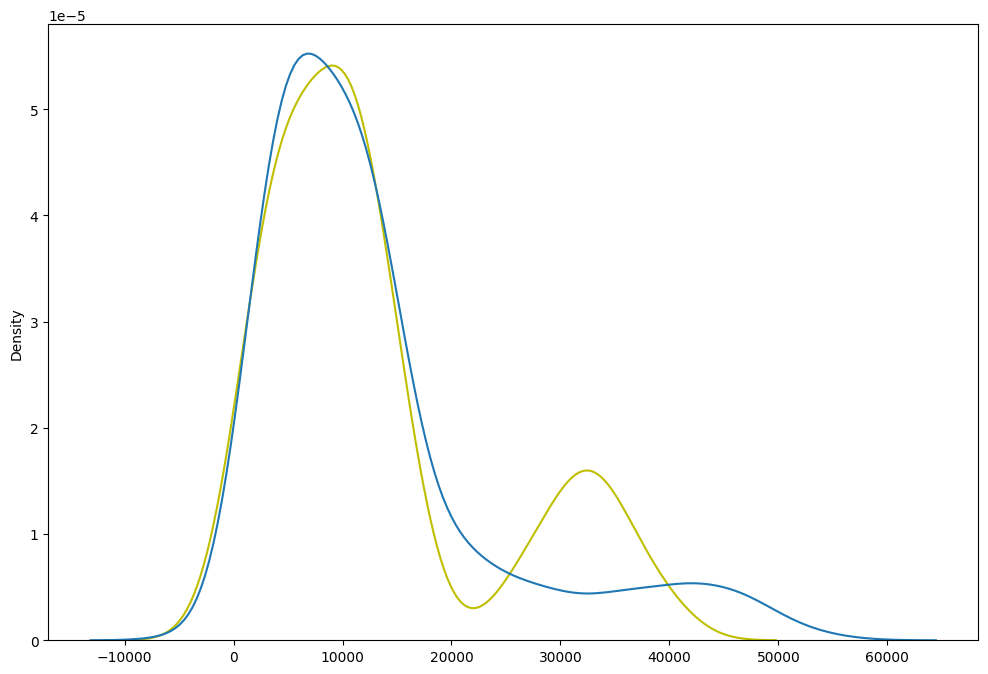

In [49]:
plt.figure(figsize=(12,8))
ax1=sns.distplot(Ytest , hist=False ,color="y", label="test data prediction")
ax=sns.distplot(Y_pr , hist=False , label="train data prediction",ax=ax1)

This distribution plot is used to display the accuracy of our predictions. From the plot, we can see that our model was performing well up until observation 20000. However, between 20000 and 50000, the model made poor predictions, resulting in an R^2 value of 0.7501059787206282.

In [31]:
resultat

[0.7125534475045631,
 0.815303278635942,
 0.8178196126362641,
 0.8235501648604538,
 0.8018844904574892]

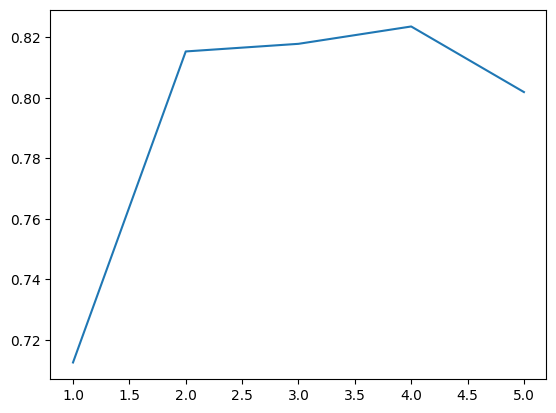

In [32]:
plt.plot(degree,resultat)

The presented graph depicts the correlation between the polynomial degree and the R^2 value. It becomes apparent from the graph that the R^2 value reaches its peak when the polynomial degree equals 4. As a result, we will modify our model by using 4 as the ideal polynomial degree.

In [33]:
poly = LinearRegression()
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train)
x_test_pr  = pr.fit_transform(x_test)
poly.fit(x_train_pr,y_train)
Y_pr2=poly.predict(x_test_pr)

In [52]:
plt.figure(figsize=(12,8))
poly.score(x_test_pr,y_test)



0.8235501648604538

<Figure size 1200x800 with 0 Axes>

In [50]:
ax1= sns.distplot(y_test,hist=False,color='y',label="actual values")
sns.distplot(Y_pr2, hist=False,color="b",label="predicted values",ax=ax1)

/tmp/ipykernel_144/1155419913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(y_test,hist=False,color='y',label="actual values")
/tmp/ipykernel_144/1155419913.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pr2, hist=False,color="b",label="predicted values",ax=ax

<AxesSubplot: xlabel='charges', ylabel='Density'>

Following the application of polynomial regression, it became apparent that our model was underperforming, as demonstrated by the distribution plot. As a result, we began to explore the possibility of utilizing a Ridge regression model, which is distinguished by its Alpha hyperparameter. This crucial parameter serves to control the model's intricacy and enhance the R^2 score, ultimately leading to superior performance.

## Ridge regression 

### GridSearch 

In [54]:
RR = Ridge()
RR

Ridge()

In [59]:
parameters =[{"alpha" : [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [62]:
Grid_RR = GridSearchCV(RR, parameters,cv=4)

In [63]:
Grid_RR.fit(x_train_pr,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.50097e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.18765e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.37547e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.3434e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/shared-libs/python3.9/py/lib/pyt

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [65]:
best_RR = Grid_RR.best_estimator_
best_RR

Ridge(alpha=100000)

In [67]:
score_R =best_RR.score(x_test_pr,y_test)
score_R


0.8200062140937063

In [68]:
Y_RR = best_RR.predict(x_test_pr)

In [77]:
def distplot(actual_data , predicted_data):
    plt.figure(figsize=(12,8))
    ax1=sns.distplot(actual_data,hist=False,color="b")
    sns.distplot(predicted_data,hist=False,color="r",ax=ax1)
    



/tmp/ipykernel_144/2405594898.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(actual_data,hist=False,color="b")
/tmp/ipykernel_144/2405594898.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predicted_data,hist=False,color="r",ax=ax1)


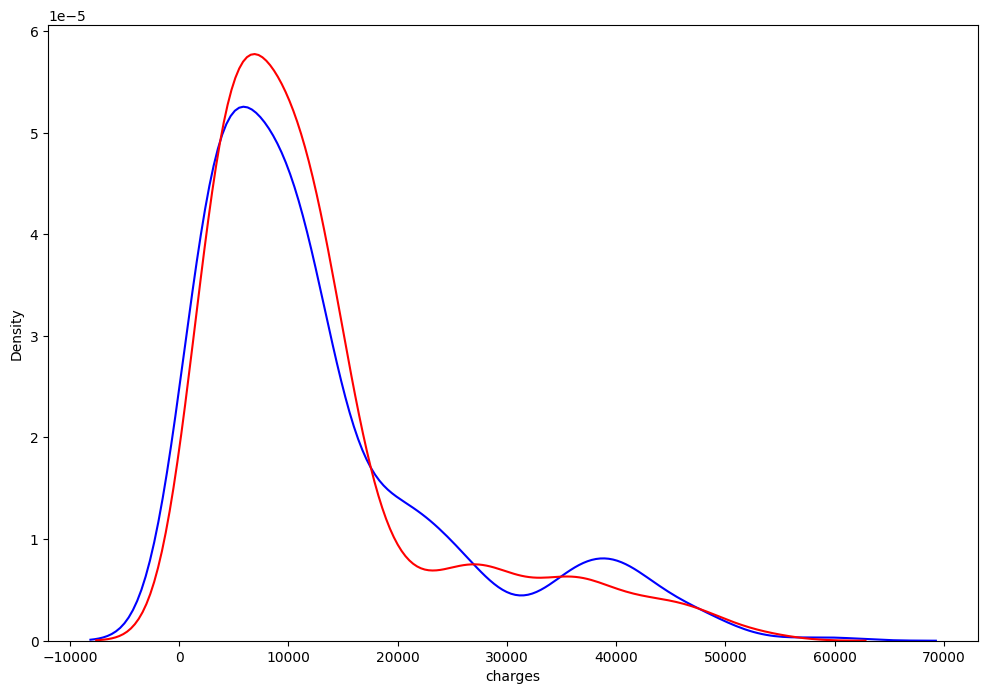

In [78]:
distplot(y_test,Y_RR)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6f0b082-6b18-4e9e-9833-a8f8f5db9440' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>